In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [160]:
data=pd.read_csv("car data.csv")
data1=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data2=pd.read_csv("Car details v3.csv")

In [161]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [162]:
data.shape

(301, 9)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [164]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [165]:
#missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

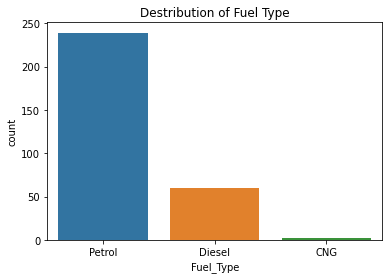

In [166]:
ax = sns.countplot(x="Fuel_Type", data=data)
plt.title("Destribution of Fuel Type")
plt.show()

In [167]:
#see the values to be encoded
catCols = [col for col in data.columns if data[col].dtype=="O" and col!="Car_Name"]
for feature in catCols:
    print(data[feature].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [168]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [169]:
#enoding categorical variables
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [170]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [171]:
#dependent and independent variables
X=data.drop(["Car_Name","Selling_Price"],axis=1)
y=data["Selling_Price"]

In [172]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

### Linear Regression 

In [173]:
#using Linear Regression model
lr=LinearRegression()

In [174]:
lr.fit(X_train,y_train)

LinearRegression()

In [175]:
#training data prediction
lr_train_pred=lr.predict(X_train)

In [176]:
#R squared error
error_score=metrics.r2_score(y_train,lr_train_pred)
print("R Square Error for Linear Regresion : ",error_score)

R Square Error for Linear Regresion :  0.8799451660493698


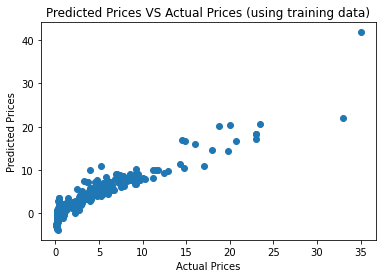

In [177]:
#plotting actual prices and predicted prices
plt.scatter(y_train,lr_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices VS Actual Prices (using training data)")
plt.show()

In [178]:
#get prediction with testing data
lr_test_pred=lr.predict(X_test)
#R squared error
error_score=metrics.r2_score(y_test,lr_test_pred)
print("R Square Error for Linear Regresion : ",error_score)

R Square Error for Linear Regresion :  0.8365766715026905


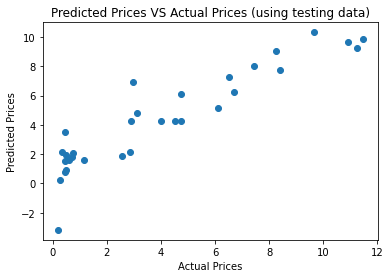

In [179]:
#plotting actual prices and predicted prices
plt.scatter(y_test,lr_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices VS Actual Prices (using testing data)")
plt.show()

### Lasso Regression 

In [180]:
lasso=Lasso()

In [181]:
lasso.fit(X_train,y_train)

Lasso()

In [182]:
#training data prediction
lasso_train_pred=lasso.predict(X_train)

In [187]:
#R squared error
error_score=metrics.r2_score(y_train,lasso_train_pred)
print("R Square Error for Lasso Regresion : ",error_score)

R Square Error for Lasso Regresion :  0.8427856123435794


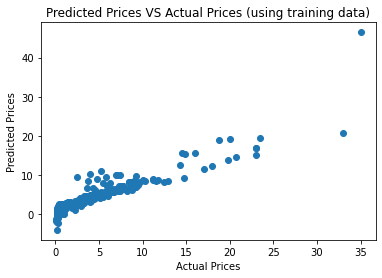

In [184]:
#plotting actual prices and predicted prices
plt.scatter(y_train,lasso_train_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices VS Actual Prices (using training data)")
plt.show()

In [188]:
#get prediction with testing data
lasso_test_pred=lasso.predict(X_test)
#R squared error
error_score=metrics.r2_score(y_test,lasso_test_pred)
print("R Square Error for Lasso Regresion : ",error_score)

R Square Error for Lasso Regresion :  0.8709167941173195


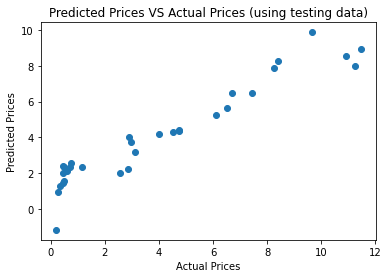

In [186]:
#plotting actual prices and predicted prices
plt.scatter(y_test,lasso_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices VS Actual Prices (using testing data)")
plt.show()